## AirBnB Data evaluation

Let's take a look at the data first

In [156]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [157]:
url = '/Users/jennawhite/documents/gaclass/wild_west/abnb_project/data/train_users_2.csv'

bnb = pd.read_csv(url, index_col='id')
bnb.shape

(213451, 15)

In [158]:
bnb.columns

Index([u'date_account_created', u'timestamp_first_active',
       u'date_first_booking', u'gender', u'age', u'signup_method',
       u'signup_flow', u'language', u'affiliate_channel',
       u'affiliate_provider', u'first_affiliate_tracked', u'signup_app',
       u'first_device_type', u'first_browser', u'country_destination'],
      dtype='object')

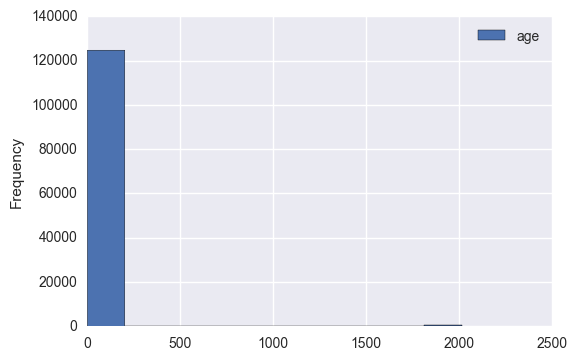

In [159]:
bnb.plot(kind='hist',y='age')

In [160]:
bnb.shape

(213451, 15)

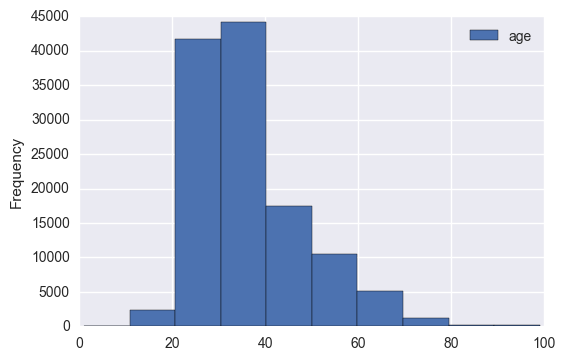

In [161]:
bnb[bnb['age']<100].plot(kind='hist', y='age')


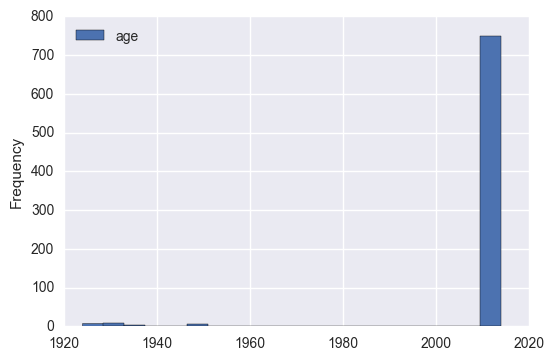

In [162]:
bnb[bnb['age']>1000].plot(kind='hist', y='age', bins=20)

In [163]:
bnb[bnb['age']>1000].age.head(10)

id
v2x0ms9c62    2014.0
umf1wdk9uc    2014.0
m82epwn7i8    2014.0
2th813zdx7    2013.0
3amf04n3o3    2014.0
6vpmryt377    2014.0
uxy91xb5p2    2014.0
bno0vva4uz    2014.0
h3rrmak4tu    2014.0
fou0j7fhnm    2014.0
Name: age, dtype: float64

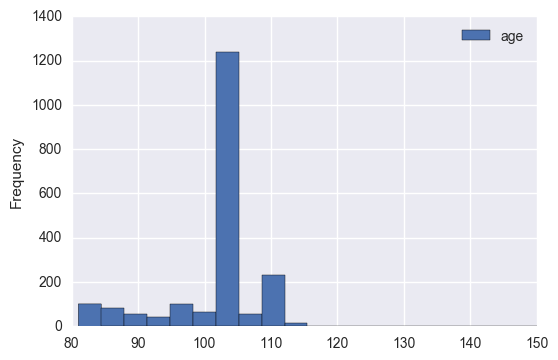

In [164]:
bnb2 = bnb[bnb['age']<1000]

bnb2[bnb2['age']>80].plot(kind='hist', y='age', bins=20)

In [165]:
print bnb2[bnb2['age']>80].shape
print bnb[bnb['age']>80].shape
print bnb['age'].shape
2771/213451

(1992, 15)
(2771, 15)
(213451,)


0

In [166]:
bnb[bnb['age']>80].head()
#there are 2771 people with ages over 80 -- looks like there are some 2014s too

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
v2x0ms9c62,2010-04-11,20100411065602,2010-04-13,-unknown-,2014.0,basic,3,en,other,craigslist,untracked,Web,Windows Desktop,Firefox,FR
9ouah6tc30,2010-04-12,20100412231534,2010-04-12,FEMALE,104.0,facebook,3,en,other,craigslist,linked,Web,iPhone,Mobile Safari,FR
dc3udjfdij,2010-05-19,20100519012455,2010-06-16,-unknown-,105.0,basic,2,en,other,craigslist,omg,Web,Mac Desktop,Safari,FR
ixv5186g1h,2010-05-21,20100521070029,NaN,MALE,95.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
umf1wdk9uc,2010-05-25,20100525155541,NaN,FEMALE,2014.0,basic,2,en,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF


In [167]:
bnb.age.isnull().sum()

87990

In [174]:
bnb.shape

(213451, 15)

In [182]:
bnb.age.isnull().value_counts()

False    125461
True      87990
Name: age, dtype: int64

In [219]:
b_dist =bnb[(bnb['age']<80) & (bnb3['age']>=18)]
len_b = 87990
rand = np.random.choice(b_dist['age'], size=87990)
bnb['age'] = bnb.age.fillna(28)
rand

array([ 56.,  26.,  32., ...,  58.,  36.,  33.])

In [220]:
bnb.age.isnull().any()

False

In [221]:
pd.Series(bnb.age).value_counts()

30.0    6124
31.0    6016
29.0    5963
28.0    5939
32.0    5855
27.0    5738
33.0    5527
26.0    5044
34.0    5029
35.0    4860
25.0    4459
36.0    4083
37.0    3694
38.0    3384
24.0    3220
39.0    2998
40.0    2766
41.0    2538
23.0    2462
42.0    2243
45.0    2149
44.0    2137
43.0    2056
46.0    1875
22.0    1702
47.0    1646
48.0    1469
50.0    1387
51.0    1337
49.0    1331
        ... 
53.0    1098
54.0    1019
55.0    1011
21.0     982
56.0     941
57.0     915
58.0     823
59.0     780
60.0     734
61.0     680
18.0     669
62.0     593
63.0     573
64.0     549
20.0     540
65.0     516
66.0     435
67.0     402
68.0     373
69.0     276
70.0     259
72.0     189
71.0     180
73.0     149
74.0     123
75.0      94
77.0      72
76.0      68
78.0      50
79.0      50
Name: age, dtype: int64

In [211]:
bnb.shape

(122486, 15)

In [212]:
bnb[(bnb['age']<18)].shape

(0, 15)

In [222]:
bnbx = bnb[(bnb['age']<80) & (bnb['age']>=18)]

In [223]:
bnb.shape

(122486, 15)

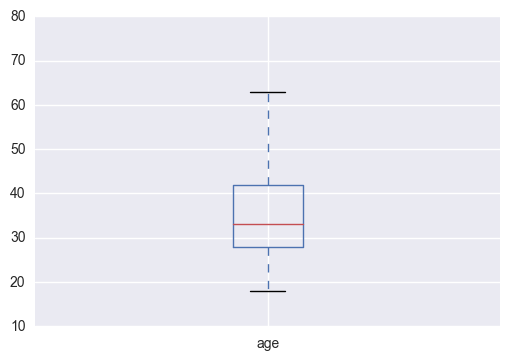

In [214]:
bnb = bnb[(bnb['age']<80) & (bnb['age']>=18)]
bnb.plot.box(y='age')

In [215]:
print np.percentile(bnb.age,25)
print np.percentile(bnb.age,75)

28.0
42.0


In [216]:
bnb.isnull().any()

date_account_created       False
timestamp_first_active     False
date_first_booking          True
gender                     False
age                        False
signup_method              False
signup_flow                False
language                   False
affiliate_channel          False
affiliate_provider         False
first_affiliate_tracked     True
signup_app                 False
first_device_type          False
first_browser              False
country_destination        False
dtype: bool

In [ ]:
bnb.date_first_booking.fillna(0, inplace=True)

In [ ]:
bnb.isnull().any()

In [ ]:
pd.Series(bnb.first_affiliate_tracked).fillna('untracked', inplace=True)

In [ ]:
bnb.isnull().any()

In [ ]:
bnb.shape

In [ ]:
bnb.columns
type(bnb.gender)

In [ ]:
bnb.isnull().sum()

In [ ]:
# gender
uk_row, uk_col = bnb[bnb['gender']=='-unknown-'].shape
m_row, m_col = bnb[bnb['gender']=='MALE'].shape
f_row, f_col = bnb[bnb['gender']=='FEMALE'].shape
o_row, o_col = bnb[bnb['gender']=='OTHER'].shape

row, col = bnb.shape

u = float(uk_row)/float(row)
m = float(m_row)/float(row)
f = float(f_row)/float(row)
o = float(o_row)/float(row)

perc = {'unknown':u, 
       'male':m,
       'female':f,
       'other':o}

print 'Accounts by Gender'
perc

In [ ]:
bnb2 = bnb[bnb['country_destination']!='NDF']

uk_row, uk_col = bnb2[bnb2['gender']=='-unknown-'].shape
m_row, m_col = bnb2[bnb2['gender']=='MALE'].shape
f_row, f_col = bnb2[bnb2['gender']=='FEMALE'].shape
o_row, o_col = bnb2[bnb2['gender']=='OTHER'].shape

row, col = bnb2.shape

u = float(uk_row)/float(row)
m = float(m_row)/float(row)
f = float(f_row)/float(row)
o = float(o_row)/float(row)

perc = {'unknown':u, 
       'male':m,
       'female':f,
       'other':o}
print 'Bookings by Gender'
perc


In [ ]:
row_bk, col3 = bnb2.shape
ATB = float(row_bk)/float(row)
ATB

## BOOKING RATES

where:
affiliate_provider == 'facebook' --> bnb_fb
affiliate_provider == 'meetup'


In [ ]:
bnb_fb = bnb[bnb['affiliate_provider']=='facebook']
row_fb, col_fb = bnb_fb.shape

ATB_FB = float(row_fb)/float(row)

bnb_mu = bnb[bnb['affiliate_provider']=='meetup']
row_mu, col_mu = bnb_mu.shape

ATB_MU = float(row_mu)/float(row)

print ATB_FB
print ATB_MU

In [ ]:
bnb.groupby('gender').count()

In [ ]:
bnb.date_first_booking.fillna(0, inplace=True)

In [ ]:
#timestamp first active

bnb['timestamp_first_active'][1]

In [ ]:
#language
bnb.groupby('language')


In [ ]:
bnb.groupby('affiliate_provider').count()

In [ ]:
print bnb.first_affiliate_tracked.shape
print pd.Series(bnb.first_affiliate_tracked).value_counts()

In [ ]:
pd.Series(bnb.first_affiliate_tracked).isnull().sum()

In [ ]:
pd.Series(bnb.first_affiliate_tracked).fillna('untracked', inplace=True)

In [ ]:
pd.Series(bnb.first_affiliate_tracked).isnull().any()

In [ ]:
pd.Series(bnb.first_affiliate_tracked).value_counts()

In [ ]:
# account created -- date value between 1/1/10 and 6/30/14



Let's think about this question: Based on observed characteristics, did a person book, and if yes, where?




